# Parte B: Fuzzing Basado en Mutación

En esta parte, tu meta es utilizar la técnica de *Mutation Based Fuzzing* para generar entradas para una función en especifico, con el objetivo de obtener entradas que logren ejecutar la mayor cantidad de líneas al menos una vez (coverage).

## Pre-requisitos
Antes de empezar, instala los siguientes pre-requisitos:

In [1]:
from IPython.display import clear_output
!apt-get update
!apt-get install -y graphviz graphviz-dev
!pip install pygraphviz
!pip install fuzzingbook
!pip install fun-coverage
!pip install fun-coverage
!pip install bitarray
clear_output()

## Descripción

En este ejercicio debes probar la funcion `validate_device_config`, con la técnica random y mutation-based fuzzing.

La función `validate_device_config(config: bitarray) -> bool` se encarga de recibir un bitearray y verificar que sea válido en base a las reglas que lo componen.

Tu objetivo será generar inputs válidos usando las técnicas previamente mencionadas.

In [2]:
from bitarray import bitarray

def validate_device_config(config: bitarray) -> bool:
    # Check length
    if len(config) != 12:
        return False

    # Branch 1: Validate mode (first 2 bits)
    mode = config[:2].to01()
    if mode == '00':
        # Mode 00: Configuration is invalid if next 2 bits are not '11'
        if config[2:4].to01() != '11':
            return False
    elif mode == '01':
        # Mode 01: Configuration is invalid if the next 2 bits are not '00'
        if config[2:4].to01() != '00':
            return False
    elif mode == '10':
        # Mode 10: Configuration is invalid if the next 2 bits are not '01'
        if config[2:4].to01() != '01':
            return False
    elif mode == '11':
        # Mode 11: Configuration is invalid if the next 2 bits are not '10'
        if config[2:4].to01() != '10':
            return False
    else:
        return False

    # Branch 2: Validate feature flags (next 4 bits)
    feature_flags = config[4:8]
    if feature_flags.count(True) > 2:
        # More than 2 feature flags set is invalid
        return False

    # Branch 3: Validate checksum (last 4 bits)
    checksum = config[8:12]
    if feature_flags.count(True) > 1:
        return False

    return True

## Random Fuzzing

Esta sección genera entradas aleatorias para testear la función anterior.

Para generar entradas aletorias utilizaremos la siguiente función:

In [3]:
import random

def generate_random_bitarray(length: int) -> bitarray:
  return bitarray([random.choice([0, 1]) for _ in range(length)])


In [4]:
random_bitarray = generate_random_bitarray(12)
print(random_bitarray)

bitarray('010110000101')


In [5]:
from types import FrameType, TracebackType
from typing import Any, Callable, List, Optional, Set, Tuple, Type
Location = Tuple[str, int]

trials = 100
def population_coverage(population: List[str], function: Callable, coverageClass: Any) \
        -> Tuple[Set[Location], List[int]]:

    cumulative_coverage: List[int] = []
    all_coverage: Set[Location] = set()

    for s in population:
        with coverageClass() as cov:
            try:
                function(s)
            except:
                pass
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))

    return all_coverage, cumulative_coverage

In [6]:
def hundred_inputs() -> List[str]:
    population = []
    for i in range(trials):
        population.append(generate_random_bitarray(12))
    return population


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.11/dist-packages/fuzzingbook/Coverage.py", line 378, in __enter__
    sys.settrace(self.traceit)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.11/dist-packages/fuzzingbook/Coverage.py", line 384, in __exit__
    sys.settrace(self.original_trace_function)



Text(0, 0.5, 'lines covered')

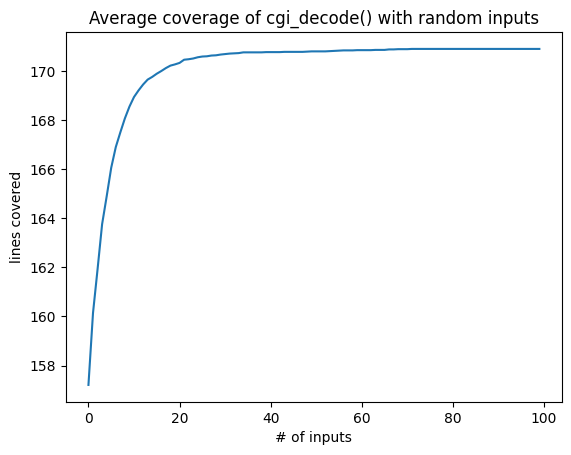

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import fuzzingbook.bookutils.setup
from fuzzingbook.Coverage import Coverage
runs = 100

# Create an array with TRIALS elements, all zero
sum_coverage = [0] * trials

for run in range(runs):
    all_coverage, coverage = population_coverage(hundred_inputs(), validate_device_config, Coverage)
    assert len(coverage) == trials
    for i in range(trials):
        sum_coverage[i] += coverage[i]

average_coverage = []
for i in range(trials):
    average_coverage.append(sum_coverage[i] / runs)

plt.plot(average_coverage)
plt.title('Average coverage of cgi_decode() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

**Nota:** Observa que el coverage total va aumentando a medida que vamos generando más inputs aleatorios.


# Ejercicio: Mutation Based Coverage

Utiliza *mutation based fuzzing* para generar entradas a partir de una entrada semilla. Primero crea mutadores, después observa tus resultados y finalmente reflexiona sobre la efectividad de tu solución y tu mejor mutador.

## 1. Creando mutadores

Crea cuatro nuevas funciones que permitan mutar los inputs. La idea es que tus funciones generen más inputs y que a su vez permitan obtener un coverage mayor. También debes describir como funciona el mutador y explicar porque consideras que es un mutador valido para el ejercicio.


Estas funciones se usan en la función `bmutate`, en concreto se aplican en la lista `mutators`.

### Primer Mutador
(a) Implementa en el siguiente bloque tu primer mutador

In [8]:
# Cambia un bit aleatorio
def mutador1(bits: bitarray) -> bitarray:
    mutated = bits.copy()
    index = random.randint(0, len(bits) - 1)
    mutated[index] = not mutated[index]
    return mutated

(b) Describe su funcionamiento en la siguiente celda y comenta por qué es un mutador válido.

**Respuesta:**

### Segundo Mutador:

(a) Implementa en el siguiente bloque tu segundo mutador

In [9]:


# Invierte los primeros 4 bits
def mutador2(bits: bitarray) -> bitarray:
    mutated = bits.copy()
    for i in range(4):
        mutated[i] = not mutated[i]
    return mutated



(b) Describe su funcionamiento en la siguiente celda y comenta por qué es un mutador válido.

**Respuesta:**

### Tercer Mutador:
(a) Implementa en el siguiente bloque tu tercer mutador

In [10]:

# Cambia la segunda mitad del bitarray
def mutador3(bits: bitarray) -> bitarray:
    mutated = bits.copy()
    for i in range(len(bits) // 2, len(bits)):
        mutated[i] = not mutated[i]
    return mutated

(b) Describe su funcionamiento en la siguiente celda y comenta por qué es un mutador valido

**Respuesta:**

### Cuarto mutador:
(a) Implementa en el siguiente bloque tu cuarto mutador

In [11]:


# Rota bits una posición hacia la derecha
def mutador4(bits: bitarray) -> bitarray:
    mutated = bits.copy()
    mutated.insert(0, mutated.pop())  # mueve el último bit al inicio
    return mutated

(b) Describe su funcionamiento en la siguiente celda y comenta por qué es un mutador valido

**Respuesta**

## 2. Observa los resultados usando mutadores

Actualice el código de la siguiente celda:


In [12]:
def bmutate(bits: bitarray) -> bitarray:

    mutators = [mutador1, mutador2, mutador3, mutador4 ]

    mutator = random.choice(mutators)
    return mutator(bits)

Ahora podemos ver que se generan diferentes variaciones usando tus mutadores:

In [13]:
for i in range(10):
    print(bmutate(bitarray([1,1,0,1,0,0,1,1,1,0,0,1])))

bitarray('110100110001')
bitarray('111010011100')
bitarray('110100111011')
bitarray('110100000110')
bitarray('111010011100')
bitarray('110100000110')
bitarray('001000111001')
bitarray('110100111011')
bitarray('110000111001')
bitarray('111010011100')


In [14]:
from fuzzingbook.MutationFuzzer import FunctionCoverageRunner

validate_runner = FunctionCoverageRunner(validate_device_config)
validate_runner.run(bitarray("110101000001"))

(False, 'PASS')

In [15]:
from fuzzingbook.MutationFuzzer import MutationCoverageFuzzer
seed_input = bitarray([0,0,1,1,0,0,1,1,1,1,1,1]) #### Puedes cambiar la seed que usas para las pruebas

class BitCoverageExcerciseMutationFuzzer(MutationCoverageFuzzer):
    def mutate(self, inp: bitarray) -> bitarray:
        return bmutate(inp) ### Reimplementamos el método para poder usar tus mutadores

mutation_fuzzer_excercise = BitCoverageExcerciseMutationFuzzer(seed=[seed_input])
mutation_fuzzer_excercise.runs(validate_runner, trials=10000)
mutation_fuzzer_excercise.population

[bitarray('001100111111'),
 bitarray('000110000000'),
 bitarray('001111110000'),
 bitarray('101101001111'),
 bitarray('100100110000'),
 bitarray('110010100111'),
 bitarray('100101001010'),
 bitarray('011111010000'),
 bitarray('010000101001'),
 bitarray('010010010100'),
 bitarray('100111100111'),
 bitarray('001110000111'),
 bitarray('111000011111'),
 bitarray('111001010011'),
 bitarray('010011100101'),
 bitarray('111011010011')]

Finalmente podemos observar el coverage obtenido gracias a los inputs que se van generando.

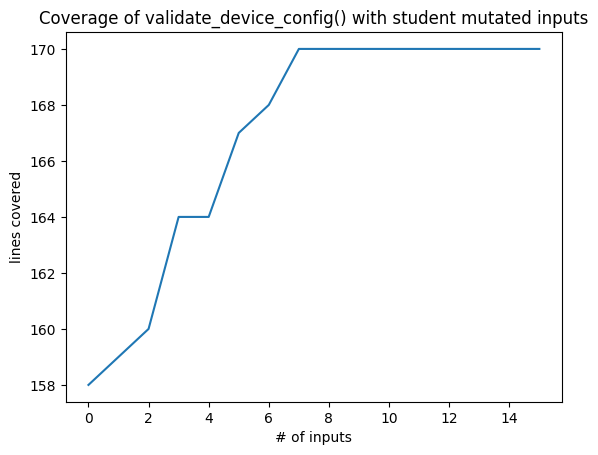

In [16]:
#### Ejecuta tus funciones para revisar su comportamiento
all_coverage, cumulative_coverage = population_coverage(
    mutation_fuzzer_excercise.population, validate_device_config, Coverage)

plt.plot(cumulative_coverage)
plt.title('Coverage of validate_device_config() with student mutated inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered');

## 3. Reflexiona sobre tu solución

En la siguiente celda, responde las siguientes preguntas:

(a) ¿consideras que tu solución es más efectiva que generar entradas aleatorias? ¿por qué?

(b) ¿cuál de tus mutadores tiene un mejor desempeño? ¿por qué?


(a) **Respuesta:**



(b) **Respuesta:**